In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import torchvision
from torchvision import datasets,transforms


In [ ]:
#transforming the input image into a normalized tensor
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

In [ ]:
trainset = datasets.MNIST(root='./data',download=True,train=True,transform=transform)
testset = datasets.MNIST(root='./data',download=True,train=False,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testloader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


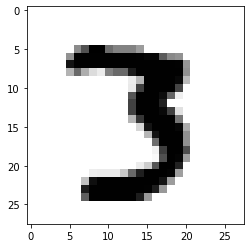

In [ ]:
plt.imshow(images[21].numpy().squeeze(),cmap='gray_r')

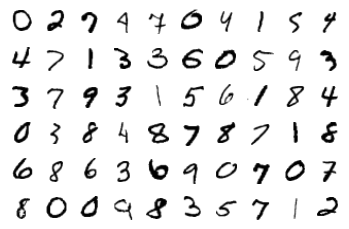

In [ ]:
#printing a grid of images from the dataset
figure = plt.figure()
num_of_images = 60
for i in range(1,num_of_images + 1):
  plt.subplot(6,10,i)
  plt.axis('off')
  plt.imshow(images[i].numpy().squeeze(),cmap='gray_r')

In [ ]:
input = 784
hidden_size = [128,64] # 2 hidden layers with 128 neurons in the first layer and 64 neurons in the second layer
output = 10

model = nn.Sequential(
    nn.Linear(input,hidden_size[0]),
    nn.ReLU(),
    nn.Linear(hidden_size[0],hidden_size[1]),
    nn.ReLU(),
    nn.Linear(hidden_size[1],output),
    nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
loss = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)
#print(images.shape)
pred_val = model(images)
#print(logps)
loss_value = loss(pred_val,labels)

In [ ]:
print(model[0].weight.grad) # Before backPropagation
loss_value.backward()
print(model[0].weight.grad) # after backpropagation

None
tensor([[-0.0034, -0.0034, -0.0034,  ..., -0.0034, -0.0034, -0.0034],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        ...,
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0025, -0.0025, -0.0025,  ..., -0.0025, -0.0025, -0.0025],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003]])


In [ ]:
%%time
optimizer = optim.SGD(model.parameters(),lr=0.003, momentum=0.9)
epochs = 15

for epoch in range(1,epochs + 1):
  loss_arr=0
  for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output = model(images)
    loss_val = loss(output,labels)
    loss_val.backward()
    optimizer.step()
    loss_arr += loss_val.item()
  print("Epochs {}/15 -- Training loss: {}".format(epoch,loss_arr/len(trainloader)))



Epochs 1/15 -- Training loss: 0.28371604501819814
Epochs 2/15 -- Training loss: 0.22160093056590063
Epochs 3/15 -- Training loss: 0.1787534517996601
Epochs 4/15 -- Training loss: 0.14920321192695643
Epochs 5/15 -- Training loss: 0.12678092759031095
Epochs 6/15 -- Training loss: 0.10995641900802344
Epochs 7/15 -- Training loss: 0.09646326457130423
Epochs 8/15 -- Training loss: 0.0874042860629446
Epochs 9/15 -- Training loss: 0.07789433162027934
Epochs 10/15 -- Training loss: 0.07064289060224697
Epochs 11/15 -- Training loss: 0.06467119369557553
Epochs 12/15 -- Training loss: 0.0593101343692048
Epochs 13/15 -- Training loss: 0.05516612715622001
Epochs 14/15 -- Training loss: 0.049788435115101635
Epochs 15/15 -- Training loss: 0.04709046430263255
CPU times: user 2min 30s, sys: 178 ms, total: 2min 30s
Wall time: 2min 30s


In [ ]:
def view_classify(img,ps):
  ps = ps.data.numpy().squeeze()
  fig,(ax1,ax2) = plt.subplots(figsize=(6,9),ncols=2)
  ax1.imshow(img.resize_(1,28,28).numpy().squeeze())
  ax1.axis('off')
  ax2.barh(np.arange(10),ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(np.arange(10))
  ax2.set_title("class probability")
  ax2.set_xlim(0,1.1)
  plt.tight_layout()


Predicted Digit =  7


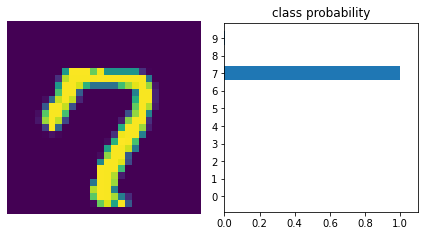

In [ ]:
#applying the trained model to a single image in testset
images,labels = next(iter(testloader))
img = images[0].view(1,784)

with torch.no_grad():
  logps = model(img)
  
ps = torch.exp(logps)
prob = list(ps.numpy()[0])
print("Predicted Digit = ",prob.index(max(prob)))
view_classify(img.view(1,28,28),ps)

In [ ]:
#Model Evaluation
correct_count , all_count = 0 , 0
for images, labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1,784)

    with torch.no_grad():
      logps = model(img)
    ps = torch.exp(logps)
    prob = list(ps.numpy()[0])
    pred_label = prob.index(max(prob))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count +=1
    all_count += 1
print("Number of Test images: ",all_count)
print("Model accuracy: ",(correct_count/all_count))
#print(correct_count)



Number of Test images:  10000
Model accuracy:  0.9752
